## MOMI Data Analysis

### Loading Required Libraries

In [19]:
# Load required packages
library(readxl)
library(dplyr)
library(tidyr)
library(ggplot2)
library(tibble)
#library(skimr)
library(patchwork)

### Importing MOMI Data

In [20]:
df_cord <- read_excel("C:/Users/Dell/Desktop/THSTI-CDSA work/MOMI Data Analysis/preg_intensities_sb_stratified_cord.xlsx", col_types = "text")

df_cord <- df_cord %>%
    type.convert(as.is = TRUE)  # Automatically convert to appropriate types

head(df_cord)    

sample_id,orig_id,site,molecule,sb_case,non_case,healthy_control,intensity_filled,intensity_fill_log,intensity_fill_log_scaled
<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>
11CB0000101,106006,AMANHIB,allopregnanolone sulfate/pregnanolone sulfate,FALSE,TRUE,TRUE,14118.23,13.78527,-1.3363408
11CB0000101,106006,AMANHIB,pregnenolone sulfate,FALSE,TRUE,TRUE,25222.12,14.62240,-0.2150055
11CB0000201,107028,AMANHIB,allopregnanolone sulfate/pregnanolone sulfate,FALSE,TRUE,FALSE,14950.39,13.86790,-1.1808550
11CB0000201,107028,AMANHIB,pregnenolone sulfate,FALSE,TRUE,FALSE,33301.87,15.02332,0.3812567
11CB0000301,72274,AMANHIB,allopregnanolone sulfate/pregnanolone sulfate,FALSE,TRUE,TRUE,18505.24,14.17565,-0.6017139
11CB0000301,72274,AMANHIB,pregnenolone sulfate,FALSE,TRUE,TRUE,18637.72,14.18594,-0.8641404


In [21]:
df_mat <- read_excel("C:/Users/Dell/Desktop/THSTI-CDSA work/MOMI Data Analysis/preg_intensities_sb_stratified_maternal.xlsx",col_types = "text")

df_mat <- df_mat %>%
    type.convert(as.is = TRUE)  # Automatically convert to appropriate types

head(df_mat)

sample_id,orig_id,site,GA_weeks,molecule,sb_case,non_case,healthy_control,intensity_filled,intensity_fill_log,intensity_fill_log_scaled
<chr>,<chr>,<chr>,<int>,<chr>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>
11BA0000104,68368,AMANHIB,26,allopregnanolone sulfate/pregnanolone sulfate,FALSE,TRUE,TRUE,16668.36,14.02482,0.6855495
11BA0000201,92320,AMANHIB,35,allopregnanolone sulfate/pregnanolone sulfate,FALSE,TRUE,FALSE,17214.47,14.07133,0.7517230
11BA0000305,63382,AMANHIB,26,allopregnanolone sulfate/pregnanolone sulfate,FALSE,TRUE,FALSE,10544.79,13.36424,-0.2543211
11BA0000405,93307,AMANHIB,26,allopregnanolone sulfate/pregnanolone sulfate,FALSE,TRUE,FALSE,8175.76,12.99714,-0.7766361
11BA0000501,63375,AMANHIB,27,allopregnanolone sulfate/pregnanolone sulfate,FALSE,TRUE,TRUE,23342.64,14.51068,1.3768210
11BA0000601,70317,AMANHIB,25,allopregnanolone sulfate/pregnanolone sulfate,FALSE,TRUE,FALSE,9321.83,13.18640,-0.5073579


### Exploratory Data Analysis

#### Dimensions of Dataframes

In [22]:
cat("\n Dimensions of preg_intensities_sb_stratified_cord: ")
cat(dim(df_cord))
cat("\n Dimensions of preg_intensities_sb_stratified_maternal: ")
cat(dim(df_mat))


 Dimensions of preg_intensities_sb_stratified_cord: 13580 10
 Dimensions of preg_intensities_sb_stratified_maternal: 53582 11

#### Names of Columns

In [23]:
cat("Columns in preg_intensities_sb_stratified_maternal:")
names(df_mat)
cat("Columns in preg_intensities_sb_stratified_cord:")
names(df_cord)

Columns in preg_intensities_sb_stratified_maternal:

[1] "sample_id"                 "orig_id"                  
 [3] "site"                      "GA_weeks"                 
 [5] "molecule"                  "sb_case"                  
 [7] "non_case"                  "healthy_control"          
 [9] "intensity_filled"          "intensity_fill_log"       
[11] "intensity_fill_log_scaled"

Columns in preg_intensities_sb_stratified_cord:

[1] "sample_id"                 "orig_id"                  
 [3] "site"                      "molecule"                 
 [5] "sb_case"                   "non_case"                 
 [7] "healthy_control"           "intensity_filled"         
 [9] "intensity_fill_log"        "intensity_fill_log_scaled"

#### Unique Values

In [24]:
# For loop to print count of unique values for each column
cat("Count of unique values in preg_intensities_sb_stratified_maternal columns: \n")
for (col_name in colnames(df_mat)) {
  cat(col_name,"\t")
  cat(length(unique(df_mat[[col_name]])))
  cat("\n")
}

Count of unique values in preg_intensities_sb_stratified_maternal columns: 
sample_id 	26791
orig_id 	14515
site 	5
GA_weeks 	36
molecule 	2
sb_case 	2
non_case 	2
healthy_control 	2
intensity_filled 	29570
intensity_fill_log 	29570
intensity_fill_log_scaled 	40898


In [25]:
cat("Count of unique values in preg_intensities_sb_stratified_cord columns: \n")
for (col_name in colnames(df_cord)) {
  cat(col_name,"\t")
  cat(length(unique(df_cord[[col_name]])))
  cat("\n")
}

Count of unique values in preg_intensities_sb_stratified_cord columns: 
sample_id 	6790
orig_id 	6775
site 	5
molecule 	2
sb_case 	2
non_case 	2
healthy_control 	2
intensity_filled 	12349
intensity_fill_log 	12349
intensity_fill_log_scaled 	13287


#### Missing Data

In [26]:
#library(tibble)
cat("Missing data in preg_intensities_sb_stratified_cord: \n")

missing_data <- sapply(df_cord, function(x) sum(is.na(x) | x == ""))

# Convert to tibble for better readability
missing_data_df <- tibble(variable = names(missing_data), missing_count = missing_data)

print(missing_data_df)

Missing data in preg_intensities_sb_stratified_cord: 
# A tibble: 10 × 2
   variable                  missing_count
   <chr>                             <int>
 1 sample_id                             0
 2 orig_id                               0
 3 site                                  0
 4 molecule                              0
 5 sb_case                               0
 6 non_case                              0
 7 healthy_control                       0
 8 intensity_filled                      0
 9 intensity_fill_log                    0
10 intensity_fill_log_scaled             0


In [27]:
cat("Missing data in preg_intensities_sb_stratified_maternal: \n")

missing_data <- df_mat %>%
  summarise_all(~sum(is.na(.))) %>%
  pivot_longer(cols = everything(), names_to = "variable", values_to = "missing_count")

print(missing_data)

Missing data in preg_intensities_sb_stratified_maternal: 
# A tibble: 11 × 2
   variable                  missing_count
   <chr>                             <int>
 1 sample_id                             0
 2 orig_id                               0
 3 site                                  0
 4 GA_weeks                              0
 5 molecule                              0
 6 sb_case                               0
 7 non_case                              0
 8 healthy_control                       0
 9 intensity_filled                      0
10 intensity_fill_log                    0
11 intensity_fill_log_scaled             0


#### Summary of Dataframes

In [28]:
# Print summary of each column in dataframe
cat("Summary of df_mat: \n")
print(summary(df_mat))
cat("\n")

cat("Summary of df_cord:\n")
print(summary(df_cord))
cat("\n")

Summary of df_mat: 
  sample_id           orig_id              site              GA_weeks    
 Length:53582       Length:53582       Length:53582       Min.   : 7.00  
 Class :character   Class :character   Class :character   1st Qu.:14.00  
 Mode  :character   Mode  :character   Mode  :character   Median :21.00  
                                                          Mean   :21.43  
                                                          3rd Qu.:28.00  
                                                          Max.   :42.00  
   molecule          sb_case         non_case       healthy_control
 Length:53582       Mode :logical   Mode :logical   Mode :logical  
 Class :character   FALSE:53086     FALSE:558       FALSE:34940    
 Mode  :character   TRUE :496       TRUE :53024     TRUE :18642    
                                                                   
                                                                   
                                                      

In [29]:
#Descriptive Summary of Dataframes
#skim(df_mat)
#skim(df_cord)

### Data Visualization

#### DataFrame 1

###### Histograms

Histogram of Numeric COlumns in preg_intensities_sb_stratified_maternal: 

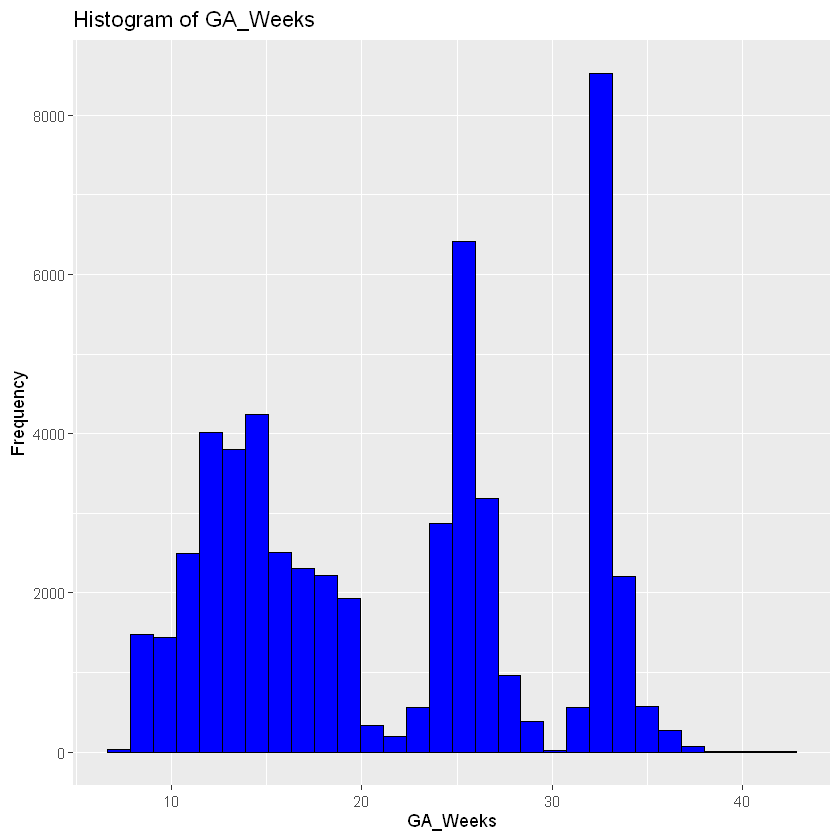

In [30]:
# Histograms for Numeric type COlumns
cat("Histogram of Numeric COlumns in preg_intensities_sb_stratified_maternal: ")
ggplot(df_mat, aes(x = GA_weeks)) +
  geom_histogram(bins = 30, fill = "blue", color = "black") +
  labs(title = "Histogram of GA_Weeks", x = "GA_Weeks", y = "Frequency")

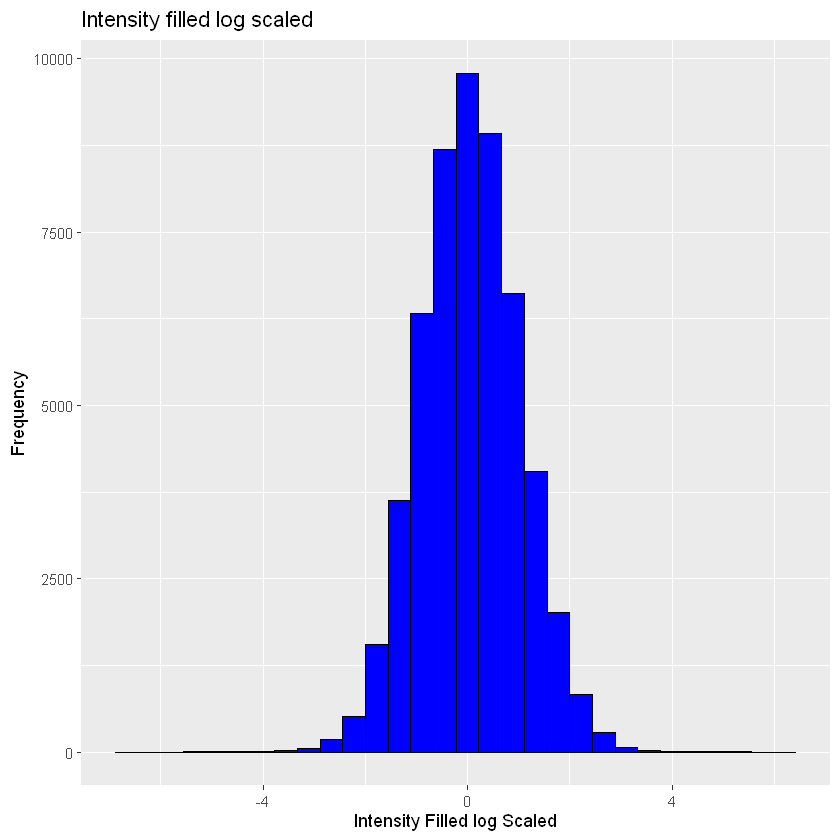

In [31]:
ggplot(df_mat, aes(x = intensity_fill_log_scaled)) +
  geom_histogram(bins = 30, fill = "blue", color = "black") +
  labs(title = "Intensity filled log scaled", x = "Intensity Filled log Scaled", y = "Frequency")

##### Bar Charts

In [32]:
head(df_mat)

sample_id,orig_id,site,GA_weeks,molecule,sb_case,non_case,healthy_control,intensity_filled,intensity_fill_log,intensity_fill_log_scaled
<chr>,<chr>,<chr>,<int>,<chr>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>
11BA0000104,68368,AMANHIB,26,allopregnanolone sulfate/pregnanolone sulfate,FALSE,TRUE,TRUE,16668.36,14.02482,0.6855495
11BA0000201,92320,AMANHIB,35,allopregnanolone sulfate/pregnanolone sulfate,FALSE,TRUE,FALSE,17214.47,14.07133,0.7517230
11BA0000305,63382,AMANHIB,26,allopregnanolone sulfate/pregnanolone sulfate,FALSE,TRUE,FALSE,10544.79,13.36424,-0.2543211
11BA0000405,93307,AMANHIB,26,allopregnanolone sulfate/pregnanolone sulfate,FALSE,TRUE,FALSE,8175.76,12.99714,-0.7766361
11BA0000501,63375,AMANHIB,27,allopregnanolone sulfate/pregnanolone sulfate,FALSE,TRUE,TRUE,23342.64,14.51068,1.3768210
11BA0000601,70317,AMANHIB,25,allopregnanolone sulfate/pregnanolone sulfate,FALSE,TRUE,FALSE,9321.83,13.18640,-0.5073579


In [33]:
#library(tidyr)
# Convert these columns to long format for easier plotting
df_long <- df_mat %>%
  pivot_longer(cols = c(healthy_control, non_case, sb_case), names_to = "category", values_to = "value")
head(df_long)

sample_id,orig_id,site,GA_weeks,molecule,intensity_filled,intensity_fill_log,intensity_fill_log_scaled,category,value
<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
11BA0000104,68368,AMANHIB,26,allopregnanolone sulfate/pregnanolone sulfate,16668.36,14.02482,0.6855495,healthy_control,TRUE
11BA0000104,68368,AMANHIB,26,allopregnanolone sulfate/pregnanolone sulfate,16668.36,14.02482,0.6855495,non_case,TRUE
11BA0000104,68368,AMANHIB,26,allopregnanolone sulfate/pregnanolone sulfate,16668.36,14.02482,0.6855495,sb_case,FALSE
11BA0000201,92320,AMANHIB,35,allopregnanolone sulfate/pregnanolone sulfate,17214.47,14.07133,0.7517230,healthy_control,FALSE
11BA0000201,92320,AMANHIB,35,allopregnanolone sulfate/pregnanolone sulfate,17214.47,14.07133,0.7517230,non_case,TRUE
11BA0000201,92320,AMANHIB,35,allopregnanolone sulfate/pregnanolone sulfate,17214.47,14.07133,0.7517230,sb_case,FALSE


Warning message:
"The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead."


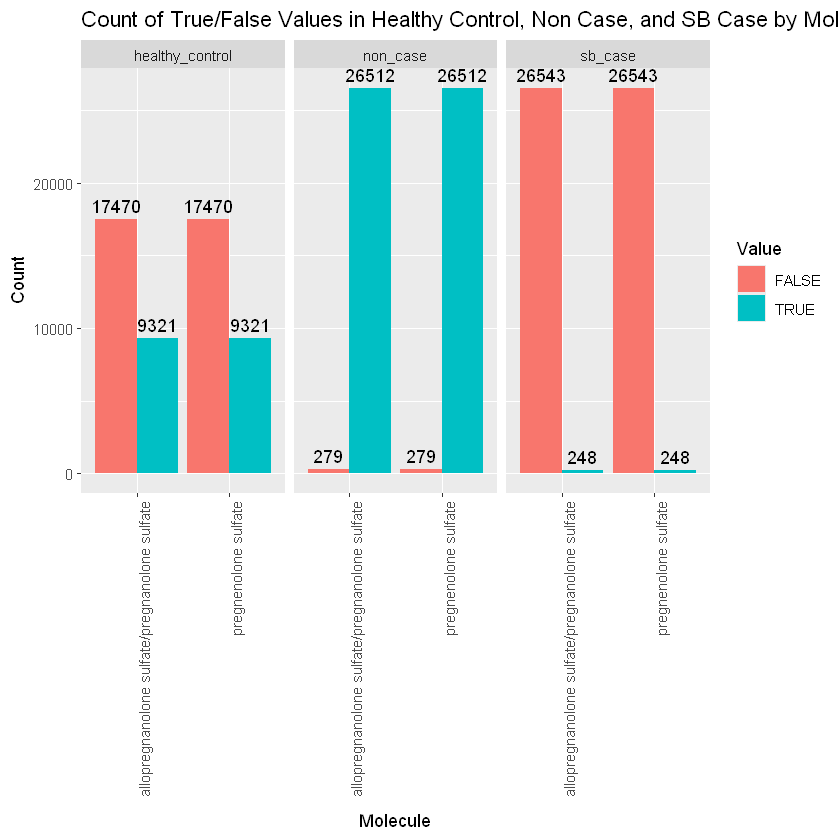

In [34]:
ggplot(data = df_long, aes(x = molecule, fill = value)) +
  geom_bar(position = "dodge", stat = "count") +
  geom_text(stat = "count", aes(label = ..count..), position = position_dodge(width = 0.9), vjust = -0.5) + 
  facet_wrap(~ category) +
  labs(title = "Count of True/False Values in Healthy Control, Non Case, and SB Case by Molecule",
       x = "Molecule",
       y = "Count",
       fill = "Value") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) # FOr Horizontal Labels in x axis

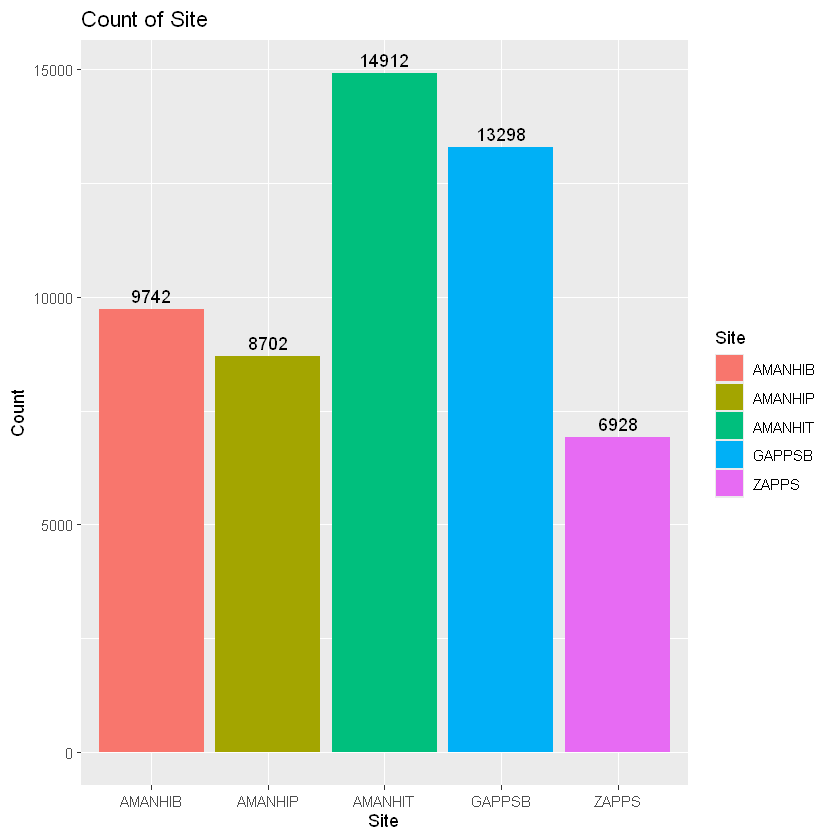

In [35]:
ggplot(data = df_mat, aes(x = site , fill = site)) +
  geom_bar(position = "dodge") +
  geom_text(stat = "count", aes(label = ..count..), position = position_dodge(width = 0.9), vjust = -0.5) +
  labs(title = "Count of Site",
       x = "Site",
       y = "Count",
       fill = "Site")

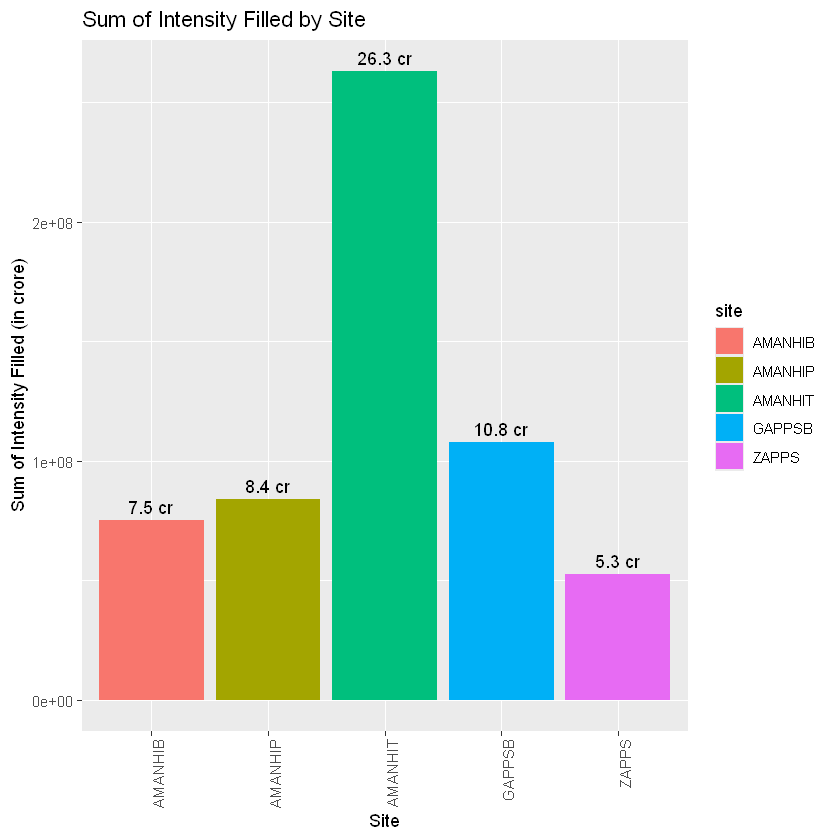

In [36]:
# Calculate the sum of intensity_filled for each site
df_sum <- df_mat %>%
  group_by(site) %>%
  summarise(sum_intensity_filled = sum(intensity_filled, na.rm = TRUE))

# Create the bar graph with data labels rounded to 0 decimal places and converted to crore
ggplot(data = df_sum, aes(x = site, y = sum_intensity_filled, fill = site)) +
  geom_col(position = "dodge") +
  geom_text(aes(label = paste0(round(sum_intensity_filled / 10000000, 1), " cr")), position = position_dodge(width = 0.9), vjust = -0.5) +
  labs(title = "Sum of Intensity Filled by Site",
       x = "Site",
       y = "Sum of Intensity Filled (in crore)") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

#### DataFrame 2

#### Merged Dataframe

##### EDA

In [37]:
common_columns <- intersect(names(df_cord), names(df_mat))
df_mat <- df_mat %>% select(all_of(common_columns))
df_cord <- df_cord %>% select(all_of(common_columns))

df_merged = bind_rows(df_mat, df_cord)
head(df_merged)

sample_id,orig_id,site,molecule,sb_case,non_case,healthy_control,intensity_filled,intensity_fill_log,intensity_fill_log_scaled
<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>
11BA0000104,68368,AMANHIB,allopregnanolone sulfate/pregnanolone sulfate,FALSE,TRUE,TRUE,16668.36,14.02482,0.6855495
11BA0000201,92320,AMANHIB,allopregnanolone sulfate/pregnanolone sulfate,FALSE,TRUE,FALSE,17214.47,14.07133,0.7517230
11BA0000305,63382,AMANHIB,allopregnanolone sulfate/pregnanolone sulfate,FALSE,TRUE,FALSE,10544.79,13.36424,-0.2543211
11BA0000405,93307,AMANHIB,allopregnanolone sulfate/pregnanolone sulfate,FALSE,TRUE,FALSE,8175.76,12.99714,-0.7766361
11BA0000501,63375,AMANHIB,allopregnanolone sulfate/pregnanolone sulfate,FALSE,TRUE,TRUE,23342.64,14.51068,1.3768210
11BA0000601,70317,AMANHIB,allopregnanolone sulfate/pregnanolone sulfate,FALSE,TRUE,FALSE,9321.83,13.18640,-0.5073579


###### Dimensions

In [38]:
print(dim(df_merged))

[1] 67162    10


###### Column Names

In [39]:
cat("Columns Names:")
cat(names(df_merged))

Columns Names:sample_id orig_id site molecule sb_case non_case healthy_control intensity_filled intensity_fill_log intensity_fill_log_scaled

###### Unique Values

In [40]:
# For loop to print count of unique values for each column
cat("Count of unique values: \n")
for (col_name in colnames(df_merged)) {
  cat(col_name,"\t")
  cat(length(unique(df_merged[[col_name]])))
  cat("\n")
}

Count of unique values: 


sample_id 	33581
orig_id 	14515
site 	5
molecule 	2
sb_case 	2
non_case 	2
healthy_control 	2
intensity_filled 	38626
intensity_fill_log 	38626
intensity_fill_log_scaled 	54185


###### Missing Data

In [41]:
#library(tibble)

cat("Missing data\n")

missing_data <- sapply(df_merged, function(x) sum(is.na(x) | x == ""))

# Convert to tibble for better readability
missing_data_df <- tibble(variable = names(missing_data), missing_count = missing_data)

print(missing_data_df)

Missing data


# A tibble: 10 × 2
   variable                  missing_count
   <chr>                             <int>
 1 sample_id                             0
 2 orig_id                               0
 3 site                                  0
 4 molecule                              0
 5 sb_case                               0
 6 non_case                              0
 7 healthy_control                       0
 8 intensity_filled                      0
 9 intensity_fill_log                    0
10 intensity_fill_log_scaled             0


###### Summary

In [42]:
summary(df_merged)

  sample_id           orig_id              site             molecule        
 Length:67162       Length:67162       Length:67162       Length:67162      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
  sb_case         non_case       healthy_control intensity_filled   
 Mode :logical   Mode :logical   Mode :logical   Min.   :    78.95  
 FALSE:66638     FALSE:612       FALSE:43208     1st Qu.:  2459.12  
 TRUE :524       TRUE :66550     TRUE :23954     Median :  9015.24  
                                                 Mean   : 14157.93  
                                                 3rd Qu.: 20314.14  
                                               

##### Data Visualization

###### Histograms

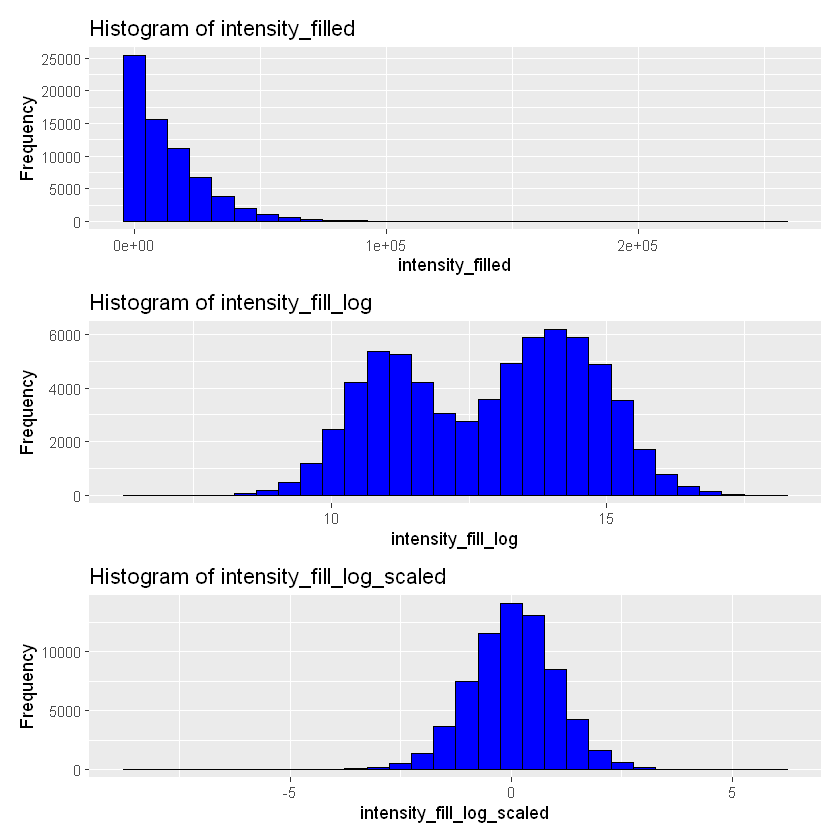

In [ ]:
#library(dplyr)
#library(patchwork)

# Select numeric columns
numeric_columns <- df_merged %>% select(where(is.numeric)) %>% names()

# Create a list to store the plots
plots <- list()

# Create histograms for each numeric column
for (col in numeric_columns) {
  p <- ggplot(df_merged, aes(x = !!sym(col))) +
    geom_histogram(bins = 30, fill = "blue", color = "black") +
    labs(title = paste("Histogram of", col), x = col, y = "Frequency")
  plots[[col]] <- p
}

# Combine the histograms into a single display
combined_plot <- wrap_plots(plots, ncol = 1)

# Print the combined plot
print(combined_plot)

###### Bar Graphs

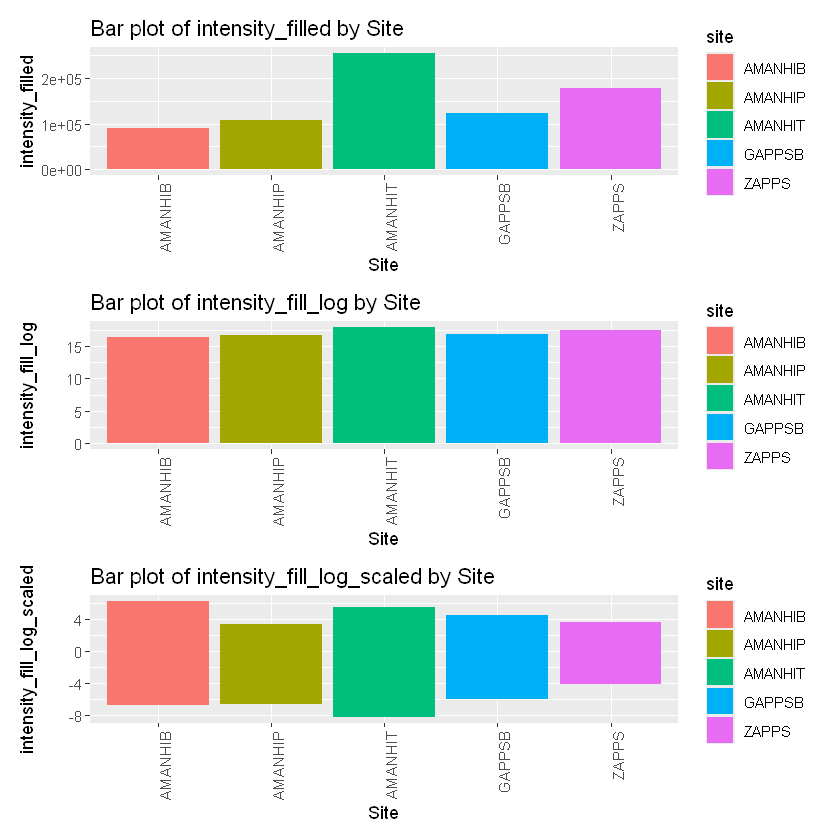

In [44]:
# Select numeric columns
numeric_columns <- df_merged %>% select(where(is.numeric)) %>% names()

# Create a list to store the plots
plots <- list()

# Create bar plots for each numeric column by site
for (col in numeric_columns) {
  p <- ggplot(df_merged, aes(x = site, y = !!sym(col), fill = site)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(title = paste("Bar plot of", col, "by Site"),
         x = "Site",
         y = col) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))
  plots[[col]] <- p
}

# Combine the plots into a single display
combined_plot <- wrap_plots(plots, ncol = 1)

# Print the combined plot
print(combined_plot)

sample_id,orig_id,site,molecule,intensity_filled,intensity_fill_log,intensity_fill_log_scaled,category,value
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
11BA0000104,68368,AMANHIB,allopregnanolone sulfate/pregnanolone sulfate,16668.36,14.02482,0.6855495,healthy_control,TRUE
11BA0000104,68368,AMANHIB,allopregnanolone sulfate/pregnanolone sulfate,16668.36,14.02482,0.6855495,non_case,TRUE
11BA0000104,68368,AMANHIB,allopregnanolone sulfate/pregnanolone sulfate,16668.36,14.02482,0.6855495,sb_case,FALSE
11BA0000201,92320,AMANHIB,allopregnanolone sulfate/pregnanolone sulfate,17214.47,14.07133,0.7517230,healthy_control,FALSE
11BA0000201,92320,AMANHIB,allopregnanolone sulfate/pregnanolone sulfate,17214.47,14.07133,0.7517230,non_case,TRUE
11BA0000201,92320,AMANHIB,allopregnanolone sulfate/pregnanolone sulfate,17214.47,14.07133,0.7517230,sb_case,FALSE


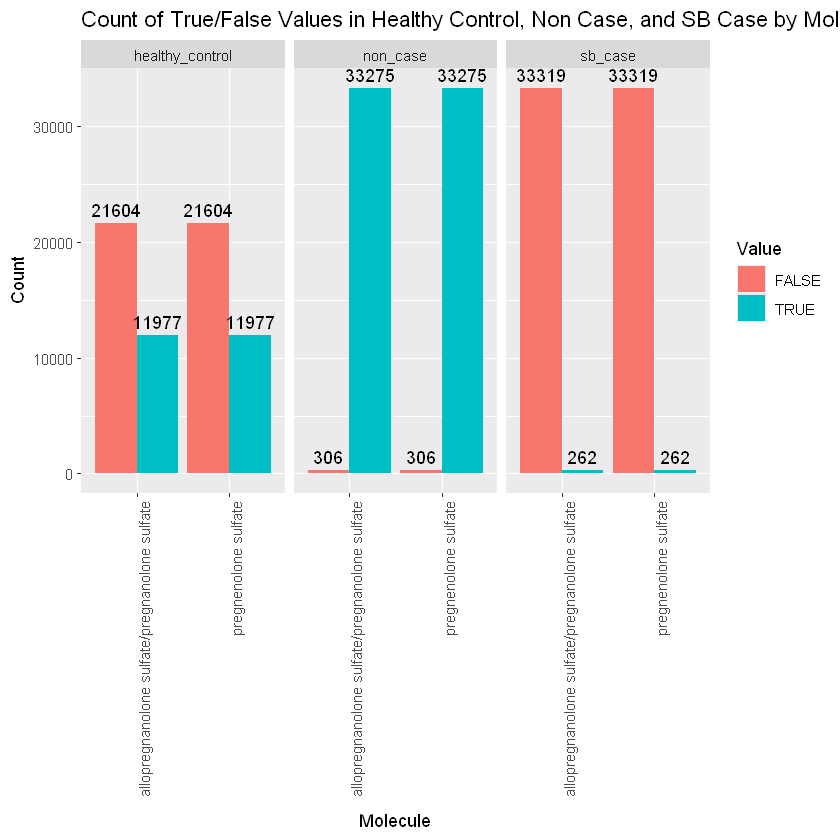

In [45]:
#Convert to long data for graphs
df_long <- df_merged %>%
  pivot_longer(cols = c(healthy_control, non_case, sb_case), names_to = "category", values_to = "value")
head(df_long)

ggplot(data = df_long, aes(x = molecule, fill = value)) +
  geom_bar(position = "dodge", stat = "count") +
  geom_text(stat = "count", aes(label = ..count..), position = position_dodge(width = 0.9), vjust = -0.5) + 
  facet_wrap(~ category) +
  labs(title = "Count of True/False Values in Healthy Control, Non Case, and SB Case by Molecule",
       x = "Molecule",
       y = "Count",
       fill = "Value") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) # FOr Horizontal Labels in x axis

###### Box Plots

Box plot of: 

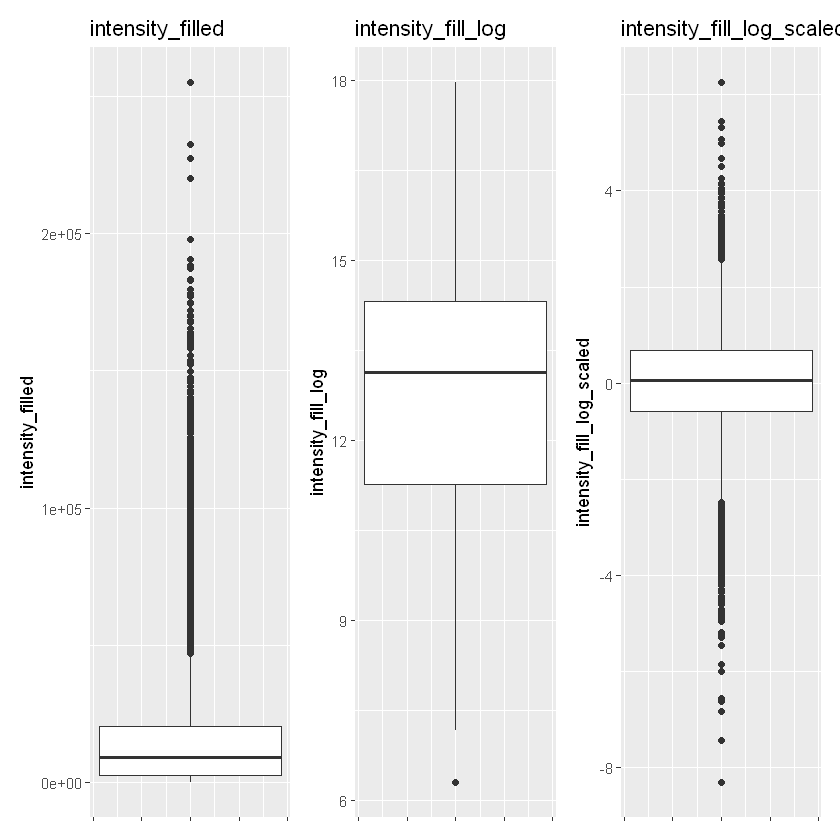

In [46]:
#library(ggplot2)
#library(dplyr)
library(patchwork)

# Plot box plots for each numeric column
numeric_columns <- df_merged %>% select(where(is.numeric)) %>% names()

# Create a list to store the plots
plots <- list()
cat("Box plot of: ")
for (col in numeric_columns) {
  p <- ggplot(df_merged, aes(y = !!sym(col))) +
    geom_boxplot() +
    labs(title = paste(col),
         y = col) +
    theme(axis.text.x = element_blank())
  plots[[col]] <- p
}

# Combine the plots side by side
combined_plot <- wrap_plots(plots, ncol = length(plots))

# Print the combined plot
print(combined_plot)

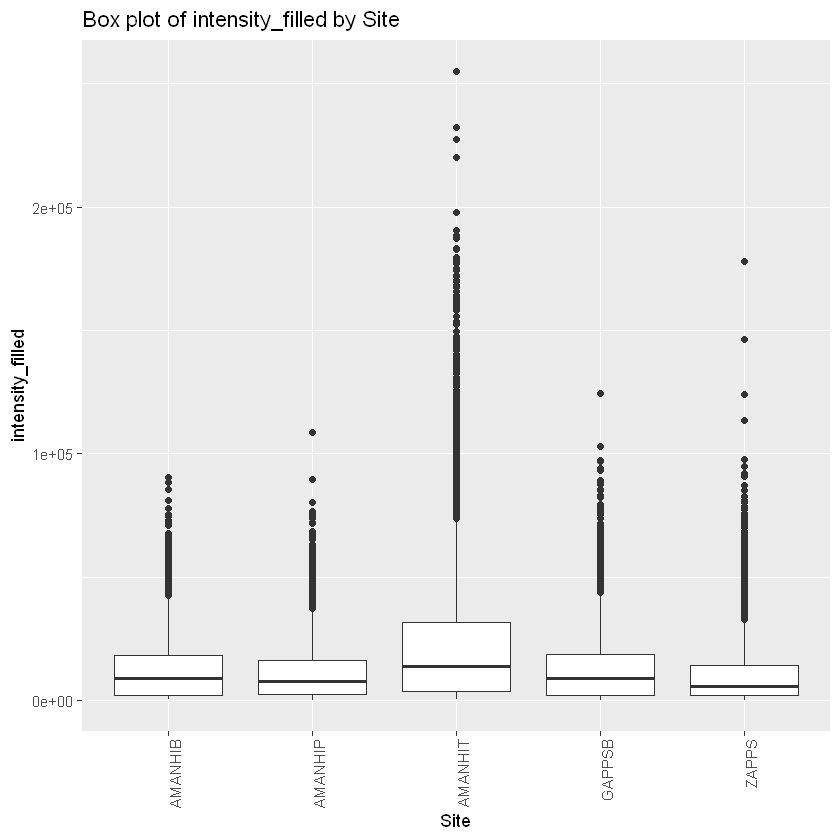

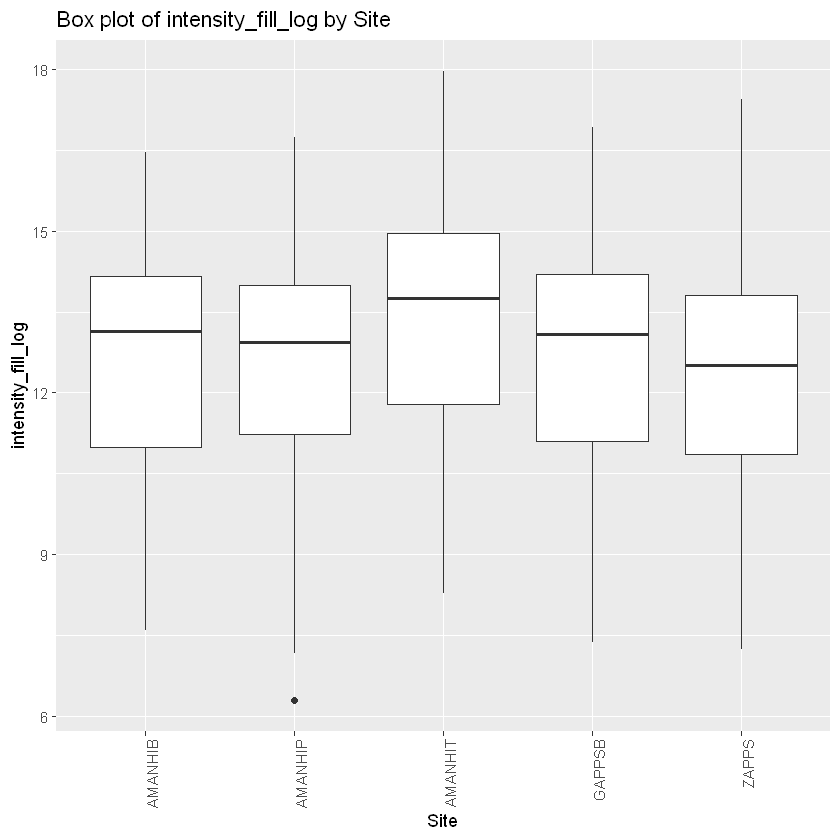

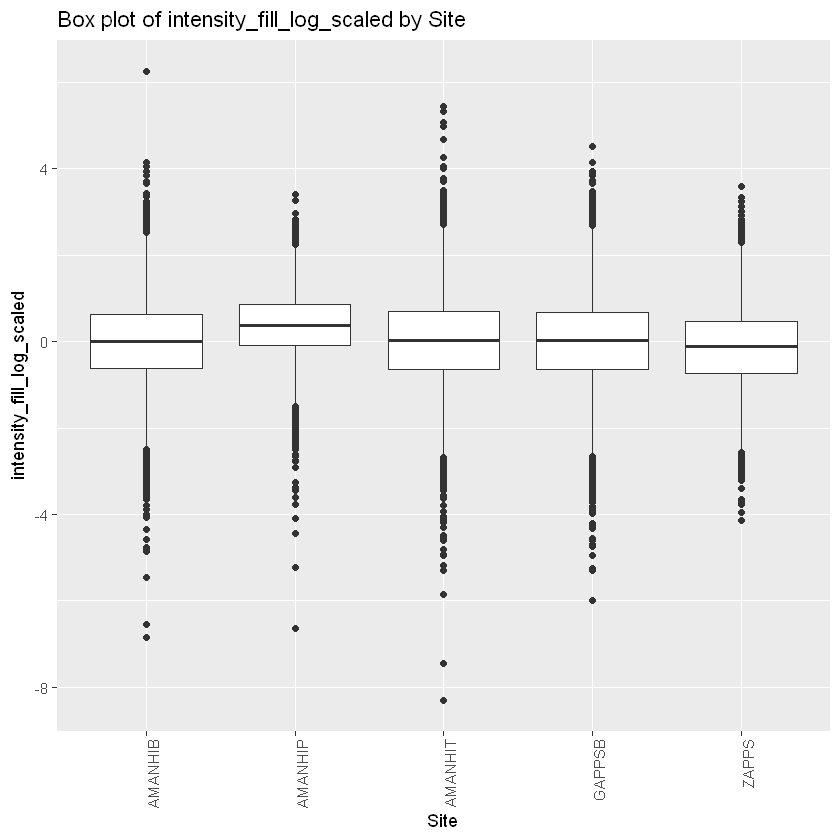

In [47]:
numeric_columns <- df_merged %>% select(where(is.numeric)) %>% names()

for (col in numeric_columns) {
  p <- ggplot(df_merged, aes(x = site, y = !!sym(col))) +
    geom_boxplot() +
    labs(title = paste("Box plot of", col, "by Site"),
         x = "Site",
         y = col) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))
  print(p)
}